In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from collections import defaultdict
from itertools import product
from functools import wraps
import json
import re
import os
from os.path import isdir, join

In [3]:
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from joblib import delayed, Parallel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib_pretty_tex as pgf

In [4]:
import utils
sns.set_context('paper', font_scale=1.4, rc={'legend.frameon': True})

In [5]:
out_dir = join('output/further_studies/cross_checks')
scenarios = ['tip_x=0um_y=+500um', 'Original_DB', 'tip_x=0um_y=-500um']
if not isdir(out_dir):
    os.makedirs(out_dir)
clusters, tracks, residuals, particles = utils.load(scenarios, fast=False)
scenarios = list(particles.scenario.cat.categories.values)

Found output/scenarios/tip_x=0um_y=+500um/residuals_0.msg
FoundFoundFound  output/scenarios/tip_x=0um_y=+500um/particles_0.msgoutput/scenarios/tip_x=0um_y=+500um/tracks_0.msg

 output/scenarios/tip_x=0um_y=+500um/clusters_0.msg
Skipping output/scenarios/tip_x=0um_y=+500um/particles_1.msg
Skipping output/scenarios/tip_x=0um_y=+500um/particles_2.msg
Skipping output/scenarios/tip_x=0um_y=+500um/particles_3.msg
Skipping output/scenarios/tip_x=0um_y=+500um/particles_4.msg
Skipping output/scenarios/tip_x=0um_y=+500um/particles_5.msg
Skipping output/scenarios/tip_x=0um_y=+500um/particles_6.msg
Found output/scenarios/tip_x=0um_y=+500um/particles_7.msg
Skipping output/scenarios/tip_x=0um_y=+500um/particles_8.msg
Found output/scenarios/tip_x=0um_y=+500um/particles_9.msg
Found output/scenarios/Original_DB/particles_0.msg
Skipping output/scenarios/Original_DB/particles_1.msg
Found output/scenarios/Original_DB/particles_2.msg
Skipping output/scenarios/Original_DB/particles_3.msg
Skipping output/sce

In [6]:
sigma = {
    0.5: 0.382924922548026,
    1: 0.682689492137086,
    2: 0.954499736103642,
    3: 0.997300203936740
}
bins = np.linspace(-0.2, 0.2, 100)
sns.set_palette(sns.color_palette('colorblind', len(scenarios)))
sns.set_style('whitegrid')

In [7]:
_clusters = clusters.set_index(['run_number', 'event_number', 'channel_id'])
_clusters.query('channel_id >= 0', inplace=True)

In [9]:
c = {k: v.drop('scenario', axis=1) for k, v in _clusters.groupby('scenario')}
_c = {}
for s in c:
    if s == 'Original_DB':
        continue
    _c[s] = c[s].join(c['Original_DB'], rsuffix='_true', how='inner')

In [11]:
_c.keys()

dict_keys(['tip_x=0um_y=+500um', 'tip_x=0um_y=-500um'])

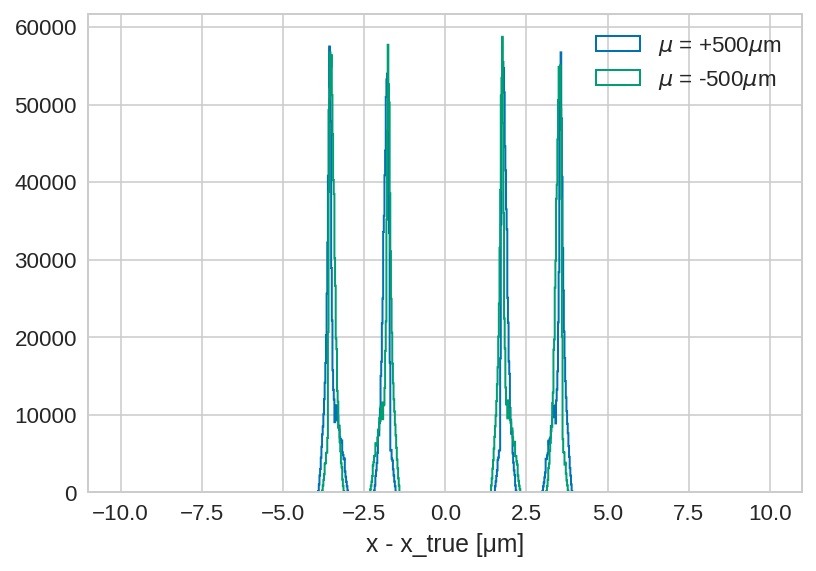

In [17]:
for k in _c:
    _c[k].eval('1000*(x - x_true)').hist(
        bins=np.linspace(-10, 10, 1000), histtype='step',
        lw=1, label=utils.format_label(k))
plt.legend(loc='best')
plt.xlabel('x - x_true [μm]')

In [ ]:
_c['tip_x=0um_y=-1000um'].eval('y - y_true').unique(), _c['tip_x=0um_y=+1000um'].eval('y - y_true').unique()

In [ ]:
_c['tip_x=0um_y=-1000um'].eval('z - z_true').hist(bins=np.linspace(-0.5, 0.5, 100))
_c['tip_x=0um_y=+1000um'].eval('z - z_true').hist(bins=np.linspace(-0.5, 0.5, 100))

In [ ]:
_c['tip_x=0um_y=-1000um'].eval('z - z_true').hist(bins=np.linspace(-0.5, 0.5, 100))
_c['tip_x=0um_y=+1000um'].eval('z - z_true').hist(bins=np.linspace(-0.5, 0.5, 100))

In [ ]:
_ = plt.hist2d(
    _c['tip_x=0um_y=+1000um'].eval('x - x_true'),
    _c['tip_x=0um_y=+1000um'].eval('z - z_true'),
    bins=[np.linspace(-0.01, 0.01, 100), np.linspace(-0.5, 0.5, 100)]
)

In [ ]:
_ = plt.hist2d(
    _c['tip_x=0um_y=+1000um'].eval('x'),
    _c['tip_x=0um_y=+1000um'].eval('z - z_true'),
    bins=[np.linspace(-50, 50, 100), np.linspace(-0.5, 0.5, 100)]
)

In [ ]:
_ = plt.hist2d(
    _c['tip_x=0um_y=+1000um'].eval('y'),
    _c['tip_x=0um_y=+1000um'].eval('z - z_true'),
    bins=[np.linspace(-50, 50, 100), np.linspace(-0.5, 0.5, 100)]
)

In [ ]:
_ = plt.hist2d(
    _c['tip_x=0um_y=+1000um'].eval('x'),
    _c['tip_x=0um_y=+1000um'].eval('y'),
    bins=[np.linspace(-50, 50, 100), np.linspace(-50, 50, 100)]
)

In [ ]:
_ = plt.hist2d(
    _c['tip_x=0um_y=-1000um'].eval('x - x_true'),
    _c['tip_x=0um_y=-1000um'].eval('z - z_true'),
    bins=[np.linspace(-0.01, 0.01, 100), np.linspace(-0.5, 0.5, 100)]
)

In [ ]:
_ = plt.hist2d(
    _c['tip_x=0um_y=-1000um'].query('x < 0').eval('x - x_true'),
    _c['tip_x=0um_y=-1000um'].query('x < 0').eval('z - z_true'),
    bins=[np.linspace(-0.01, 0.01, 100), np.linspace(-0.5, 0.5, 100)]
)

## How does the track desnsity look both close to and far from the PV

In [ ]:
df = residuals['Original_DB']
_bins = np.linspace(-50, 50, 100)
df.query('(sensor >= 10*4+2) & (sensor < (10+1)*4)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 10')
df.query('(sensor >= 11*4+2) & (sensor < (11+1)*4)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 11')
df.query('(sensor >= 50*4+2) & (sensor < (50+1)*4)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 50')
df.query('(sensor >= 51*4+2) & (sensor < (51+1)*4)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 51')
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('LHCb x [mm]')
plt.title('Ladder 2 and 3')

In [ ]:
df = residuals['Original_DB']
_bins = np.linspace(-25, 25, 100)
df.query('(sensor >= 16*4) & (sensor < (16+1)*4-2)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 16')
df.query('(sensor >= 17*4) & (sensor < (17+1)*4-2)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 17')
df.query('(sensor >= 50*4) & (sensor < (50+1)*4-2)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 50')
df.query('(sensor >= 51*4) & (sensor < (51+1)*4-2)').intercept_x.hist(histtype='step', lw=1, bins=_bins, label='Module 51')
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('LHCb x [mm]')
plt.title('Ladder 0 and 1')

In [ ]:
df = residuals['Original_DB']
_bins = np.linspace(-50, 50, 100)
df.query('(sensor >= 10*4+2) & (sensor < (10+1)*4)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 10')
df.query('(sensor >= 11*4+2) & (sensor < (11+1)*4)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 11')
df.query('(sensor >= 50*4+2) & (sensor < (50+1)*4)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 50')
df.query('(sensor >= 51*4+2) & (sensor < (51+1)*4)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 51')
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('LHCb y [mm]')
plt.title('Ladder 2 and 3')

In [ ]:
df = residuals['Original_DB']
_bins = np.linspace(-25, 25, 100)
df.query('(sensor >= 16*4) & (sensor < (16+1)*4-2)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 16')
df.query('(sensor >= 17*4) & (sensor < (17+1)*4-2)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 17')
df.query('(sensor >= 50*4) & (sensor < (50+1)*4-2)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 50')
df.query('(sensor >= 51*4) & (sensor < (51+1)*4-2)').intercept_y.hist(histtype='step', lw=1, bins=_bins, label='Module 51')
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('LHCb y [mm]')
plt.title('Ladder 0 and 1')

# Cross-checks

## Cluster residual $x$

In [ ]:
_bins = np.linspace(-0.0025, 0.0025, 1000)
plt.figure(figsize=[9,6])
for s in residuals:
    residuals[s].eval('intercept_x - true_intercept_x').hist(bins=_bins, histtype='step', lw=1, label=utils.format_label(s))
plt.legend(loc='best')

## Cluster residual $y$

In [ ]:
_bins = np.linspace(-0.0025, 0.0025, 1000)
plt.figure(figsize=[9,6])
for s in residuals:
    residuals[s].eval('intercept_y - true_intercept_y').hist(bins=_bins, histtype='step', lw=1, label=utils.format_label(s))
plt.legend(loc='best')

## Cluster residual $z$

In [ ]:
_bins = np.linspace(-0.5, 0.5, 1000)
plt.figure(figsize=[9,6])
for s in residuals:
    residuals[s].eval('intercept_z - true_intercept_z').hist(bins=_bins, histtype='step', lw=1, label=utils.format_label(s))
plt.legend(loc='best')

In [ ]:
def plot_cluster_residual(var, selection=lambda s: True):
    _bins = np.linspace(-0.5, 0.5, 1000)
    with sns.color_palette('colorblind', 6):
        plt.figure(figsize=[9, 6], dpi=200)
        ls = ['-', '--', 'dotted']
        alpha = [1, 0.75, 0.5]
        for i, s in enumerate(filter(selection, residuals), start=1):
            residuals[s].eval(f'{var} - true_{var}').hist(
                bins=_bins, histtype='step', lw=1, alpha=alpha[int(i/6)], ls=ls[int(i/6)], label=utils.format_label(s))
        plt.legend(loc='best')
    plt.xlim(_bins[0], _bins[-1])
    plt.xlabel(f'{var} [mm]')

## Cluster residual for "all same" distortions

In [ ]:
plot_cluster_residual('intercept_z', selection=lambda s: 'sigma' not in s and 'Original' not in s)

## Cluster residual for random distortions

In [ ]:
plot_cluster_residual('intercept_z', selection=lambda s: 'sigma' in s and 'Original' not in s)
plt.text(-0.45, plt.ylim()[1]*0.8, 'The yellow spike is M26...')
plt.text(-0.3, plt.ylim()[1]*0.75, '...it wanted to be near zero')

In [ ]:
_bins = np.linspace(-0.001, 0.001, 100)
d = residuals['tip_x=0um_y=+250um_sigma=0.5']
ls = ['-', '--', 'dotted', 'dashdot', ':']
ls += ls
plt.figure(figsize=[9,6])
for i, df in d.groupby('module'):
    if i not in [26]:
        continue
    df.eval('intercept_z - true_intercept_z').hist(
        bins=_bins, histtype='step', lw=1, ls=ls[int(i/6)], label=str(i))
plt.legend(loc='best')

## Cluster residual for $250\mu m$ distortions

In [ ]:
plot_cluster_residual('intercept_z', selection=lambda s: '250' in s and 'Original' not in s)

## Cluster residual for $500\mu m$ distortions

In [ ]:
plot_cluster_residual('intercept_z', selection=lambda s: '500' in s and 'Original' not in s)

## Cluster residual for $1000\mu m$ distortions

In [ ]:
plot_cluster_residual('intercept_z', selection=lambda s: '1000' in s and 'Original' not in s)

## TODO

In [ ]:
df = tracks.query('(track_type == "Long") & (scenario == "tip_x=0um_y=+1000um")').dropna()
df.head()

In [ ]:
_bins = np.linspace(-0.1, 0.1, 100)
plt.figure(figsize=[9,6])
df.eval('100*(tx - true_px/true_pz)').hist(bins=_bins, histtype='step', lw=1, label='tx')
df.eval('100*(ty - true_py/true_pz)').hist(bins=_bins, histtype='step', lw=1, label='ty')
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('Slope residual [%]')

In [ ]:
df.tx.hist(bins=np.linspace(-0.5, 0.5, 100))

## Slope x residual as a function of slope

In [ ]:
_bins = np.linspace(-0.5, 0.5, 200)
plt.figure(figsize=[9,6])
for scenario in ['tip_x=0um_y=+1000um', 'Original_DB', 'tip_x=0um_y=-1000um']:
    df2 = tracks.query(f'(track_type == "Long") & (scenario == "{scenario}")').dropna()
    _df = df2.query('abs(true_px/true_pz) < 0.1')
    _df.eval('100*(tx - true_px/true_pz)').hist(bins=_bins, histtype='step', lw=1, label=f'{scenario} - tx < 0.1', normed=True)
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('Slope residual [%]')

In [ ]:
_bins = np.linspace(-0.5, 0.5, 200)
plt.figure(figsize=[9,6])
for scenario in ['tip_x=0um_y=+1000um', 'Original_DB', 'tip_x=0um_y=-1000um']:
    df2 = tracks.query(f'(track_type == "Long") & (scenario == "{scenario}")').dropna()
    _df = df2.query('abs(true_px/true_pz) > 0.1')
    _df.eval('100*(tx - true_px/true_pz)').hist(bins=_bins, histtype='step', lw=1, label=f'{scenario} - tx > 0.1', normed=True)
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('Slope residual [%]')

In [ ]:
_bins = np.linspace(-1, 1, 100)
plt.figure(figsize=[9,6])
for scenario in ['tip_x=0um_y=+1000um', 'Original_DB', 'tip_x=0um_y=-1000um']:
    df2 = tracks.query(f'(track_type == "Long") & (scenario == "{scenario}")').dropna()
    _df = df2.query('abs(true_px/true_pz) > 0.2')
    _df.eval('100*(tx - true_px/true_pz)').hist(bins=_bins, histtype='step', lw=1, label=f'{scenario} - tx > 0.2', normed=True)
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('Slope residual [%]')

## Slope y residual as a function of slope

In [ ]:
_bins = np.linspace(-0.5, 0.5, 200)
plt.figure(figsize=[9,6])
for scenario in ['tip_x=0um_y=+1000um', 'Original_DB', 'tip_x=0um_y=-1000um']:
    df2 = tracks.query(f'(track_type == "Long") & (scenario == "{scenario}")').dropna()
    _df = df2.query('abs(true_py/true_pz) < 0.1')
    _df.eval('100*(ty - true_py/true_pz)').hist(bins=_bins, histtype='step', lw=1, label=f'{scenario} - ty < 0.1', normed=True)
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('Slope residual [%]')

In [ ]:
_bins = np.linspace(-0.5, 0.5, 200)
plt.figure(figsize=[9,6])
for scenario in ['tip_x=0um_y=+1000um', 'Original_DB', 'tip_x=0um_y=-1000um']:
    df2 = tracks.query(f'(track_type == "Long") & (scenario == "{scenario}")').dropna()
    _df = df2.query('abs(true_py/true_pz) > 0.1')
    _df.eval('100*(ty - true_py/true_pz)').hist(bins=_bins, histtype='step', lw=1, label=f'{scenario} - ty > 0.1', normed=True)
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('Slope residual [%]')

In [ ]:
_bins = np.linspace(-1, 1, 100)
plt.figure(figsize=[9,6])
for scenario in ['tip_x=0um_y=+1000um', 'Original_DB', 'tip_x=0um_y=-1000um']:
    df2 = tracks.query(f'(track_type == "Long") & (scenario == "{scenario}")').dropna()
    _df = df2.query('abs(true_py/true_pz) > 0.2')
    _df.eval('100*(ty - true_py/true_pz)').hist(bins=_bins, histtype='step', lw=1, label=f'{scenario} - ty > 0.1', normed=True)
plt.legend(loc='best')
plt.xlim(min(_bins), max(_bins))
plt.xlabel('Slope residual [%]')